<a href="https://colab.research.google.com/github/FraGoTe/PrediccionDengueIquitos/blob/master/CasosDengueIquitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Prediccion de Numero de Casos de Dengue En Iquitos (Prophet de Facebook) `**
---
Pronóstico de series de tiempo usando c

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [20]:
train = pd.read_csv('dengue_features_train.csv')
test = pd.read_csv('dengue_features_test.csv')
labels = pd.read_csv('dengue_labels_train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
train['total_cases'] = labels['total_cases']
prophet_data = train[['city', 'week_start_date', 'total_cases']]

In [0]:
prophet_data_iq = prophet_data[prophet_data['city'] == 'iq']\
                .drop('city', axis=1)

In [0]:
test_iq = test[test['city'] == 'iq']['week_start_date']

In [0]:
prophet_data_iq.columns = ['ds', 'y']

In [0]:
def create_forecast(train_data, test_data, flex, seas):
  prophet = Prophet(changepoint_prior_scale=flex, 
                      yearly_seasonality=seas) 
  prophet.fit(train_data)
  future_frame = prophet.make_future_dataframe(
        periods=len(test_data), 
        freq='W')
  forecast = prophet.predict(future_frame)  
  prophet.plot(forecast)
    
  forecast = forecast[['ds', 'yhat']].yhat\
        .apply(lambda x : int(x))
  return forecast[len(train_data):]


In [0]:
type (prophet_data_iq)

pandas.core.frame.DataFrame

In [0]:
type (test_iq)

pandas.core.series.Series

In [0]:
#print prophet_data_iq

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


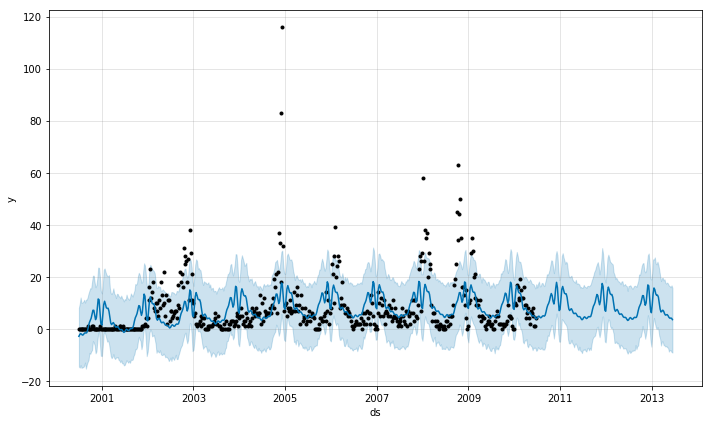

In [26]:
forecast_iq = create_forecast(prophet_data_iq, test_iq, 0.05, 10)
# las predicciones (línea azul), 
# la confianza (azul claro), 
# la tendencia (línea roja) y 
# los puntos de cambio (líneas rojas punteadas verticales).